<a href="https://colab.research.google.com/github/Theivaprakasham/BIS/blob/master/Gaussian%20Mixture%20Models%20(GMM)%20Python%20Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment  4**
Implement  GMM  hard allocation procedure to  cluster  data which has been  generated  for  Assignment  1 and  show  that  result  is  equivalent  to  the result  obtained  from Assignment  3
(Show  clearly how  likelihood of  the  data points  is  computed  for the  given  datapoints)
(show  the  likelihood convergence  criteria)
plot the results of the  clustering


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import multivariate_normal
np.random.seed(42)

# Data Initialization

Shape of X:  (500, 2)


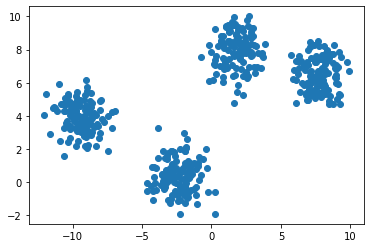

In [ ]:
# 0. Create dataset
k = 4
max_iter = int(20)

X,Y = make_blobs(cluster_std=1,random_state=20,n_samples=500,centers=4)

plt.scatter(X[:,0],X[:,1])

shape = X.shape
print('Shape of X: ',shape)
n, m = shape

# Detailed Explanation

In [ ]:
#Initialize the latent parameters
shape = X.shape
#print('Shape of X: ',shape)
n, m = shape

phi = np.full(shape=k, fill_value=1/k)
#print('Initial pi: ',phi)
weights = np.full( shape=shape, fill_value=1/k)
#print('Initial weights: ', weights)

random_row = np.random.randint(low=0, high=n, size=k)
#print('Initial random_row: ', random_row)
mu = [  X[row_index,:] for row_index in random_row ]  #Randomly assign k data values as k means
#print('Initial mu: ', mu)
sigma = [ np.cov(X.T) for _ in range(k) ]  #Computes sigma three times
#print('Initial sigma: ', sigma)

In [ ]:
#Predict the probability weights through Likelihood
def predict_proba(X):
  global sumoflikelihood
  sumoflikelihood = []
  likelihood = np.zeros( (n, k) ) #Initialize likelihood for k clusters as columns and n data points 
  for i in range(k):
      distribution = multivariate_normal(
          mean=mu[i], 
          cov=sigma[i])
      likelihood[:,i] = distribution.pdf(X) #Calculate likelihood for n data points 
      sumoflikelihood.append(likelihood.sum())
  numerator = likelihood * phi
  denominator = numerator.sum(axis=1)[:, np.newaxis] #Row wise up Summation for each data points of k cluster
  weights = numerator / denominator
  return weights

Likelihood for each 0 iteration 15.57822885576534
Likelihood for each 1 iteration 22.85884516688126
Likelihood for each 2 iteration 38.76931541183539
Likelihood for each 3 iteration 61.26452247228546
Likelihood for each 4 iteration 80.53681956021406


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Likelihood for each 5 iteration 82.93377290949354
Likelihood for each 6 iteration 83.62195845787039
Likelihood for each 7 iteration 83.77912870519154
Likelihood for each 8 iteration 83.85006695650162
Likelihood for each 9 iteration 83.91186662170794
Likelihood for each 10 iteration 84.02890513443339
Likelihood for each 11 iteration 84.36021545577685
Likelihood for each 12 iteration 85.54274136825624
Likelihood for each 13 iteration 89.79548410696084
Likelihood for each 14 iteration 95.27939002471769
Likelihood for each 15 iteration 97.09701592568416
Likelihood for each 16 iteration 98.022696539945
Likelihood for each 17 iteration 98.79887010741469
Likelihood for each 18 iteration 99.96821550431622
Likelihood for each 19 iteration 101.60517280429487


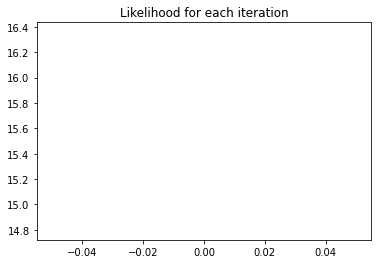

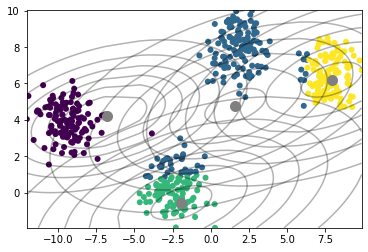

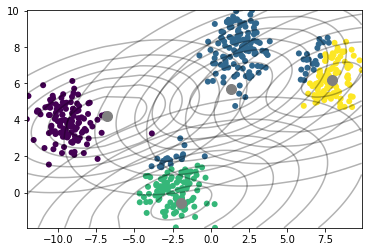

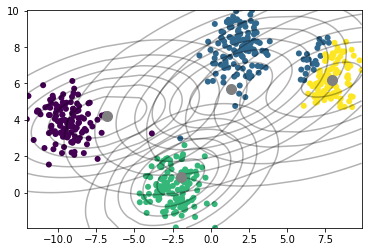

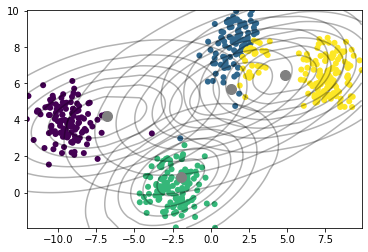

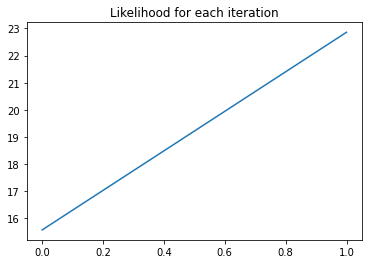

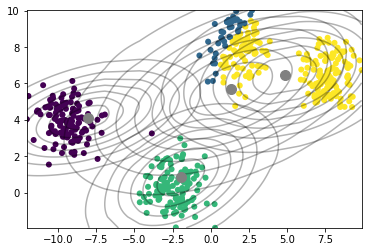

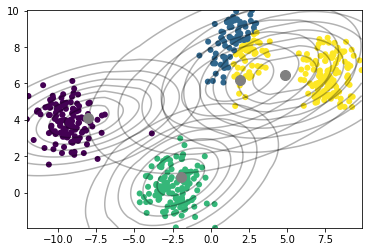

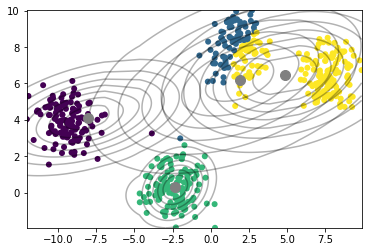

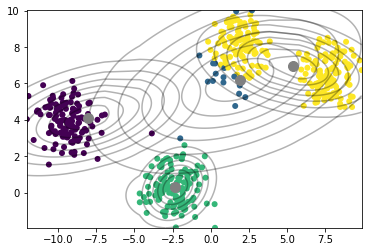

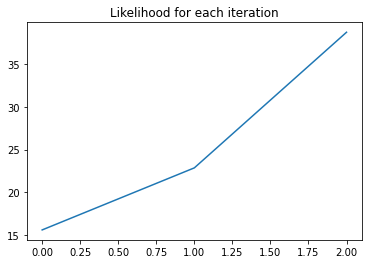

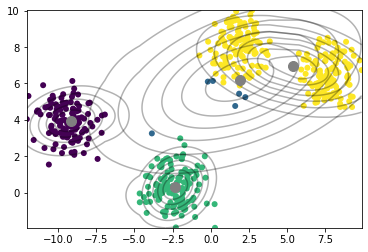

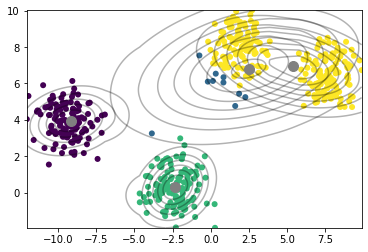

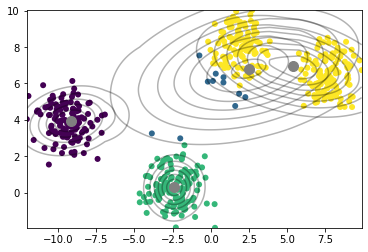

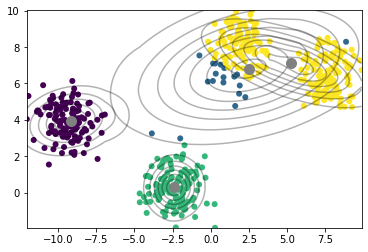

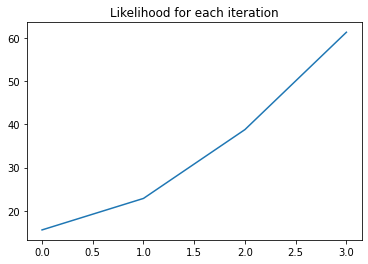

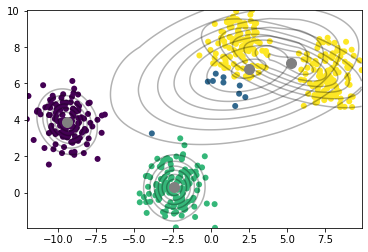

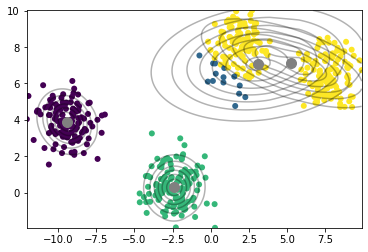

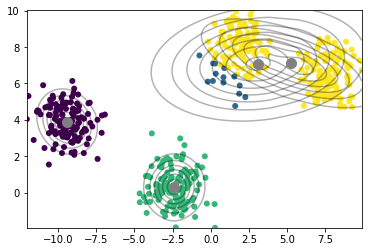

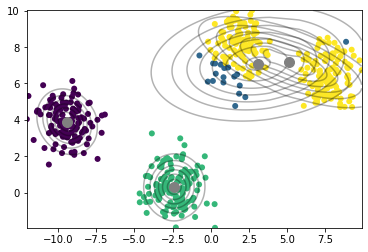

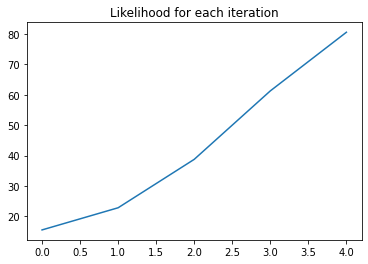

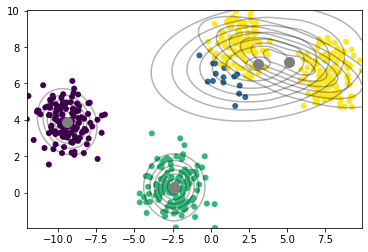

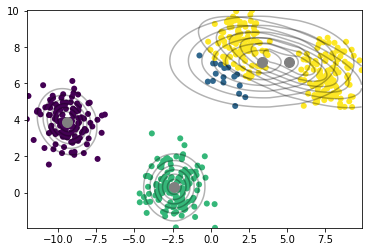

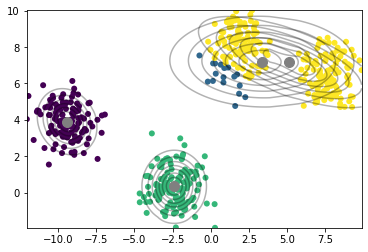

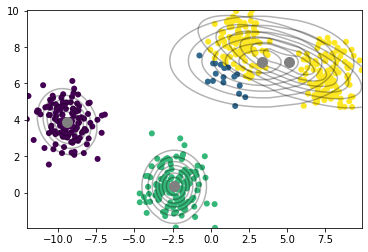

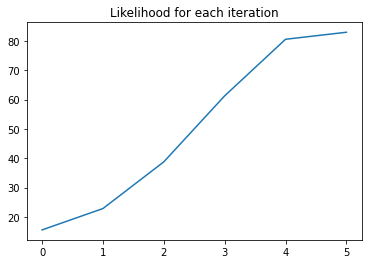

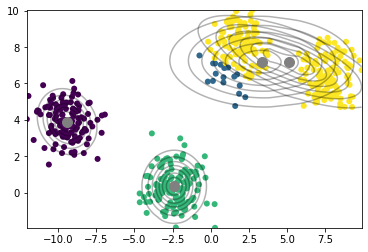

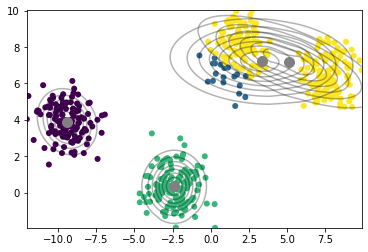

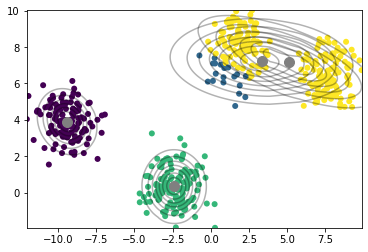

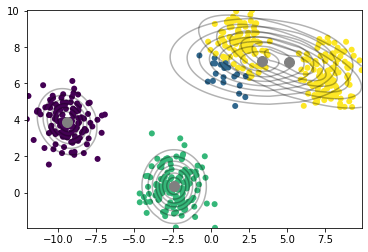

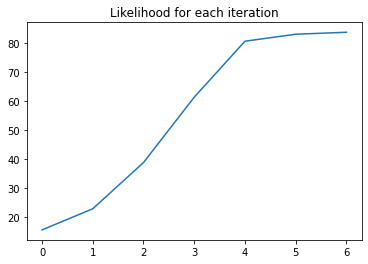

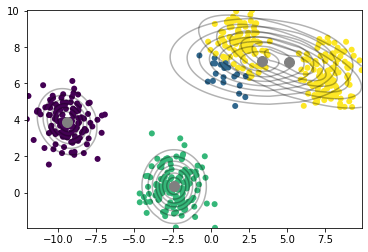

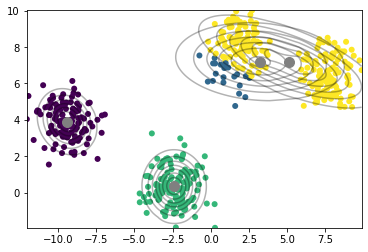

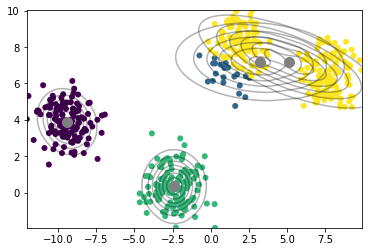

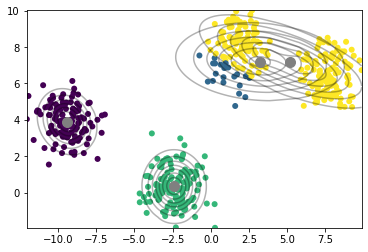

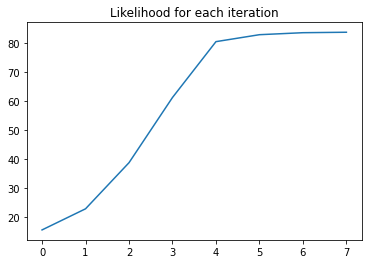

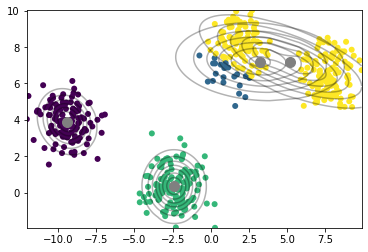

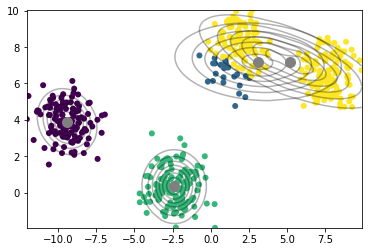

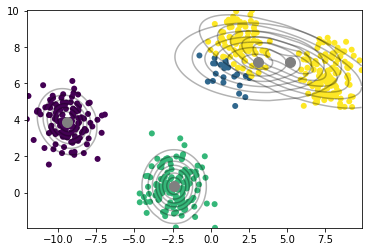

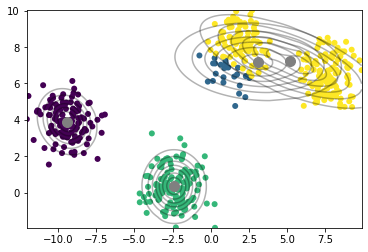

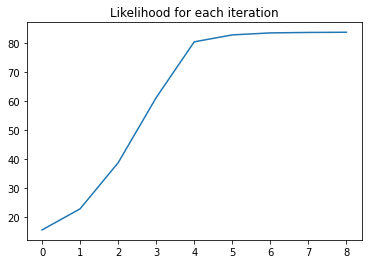

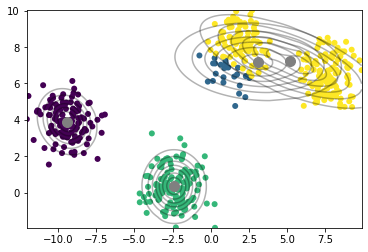

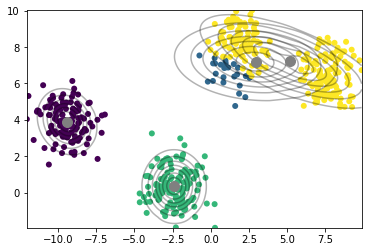

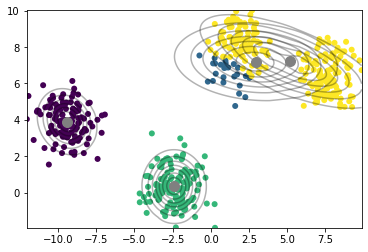

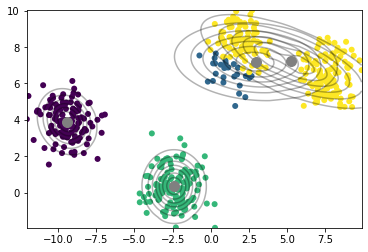

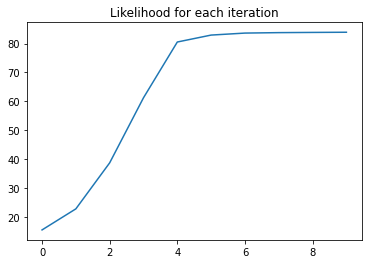

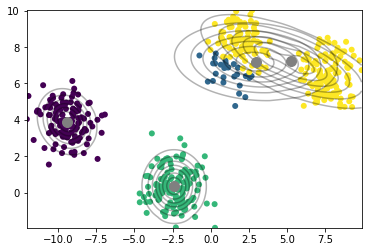

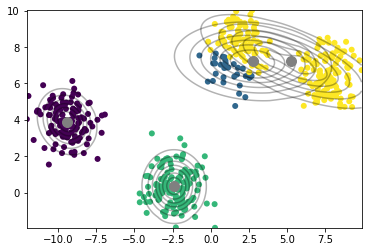

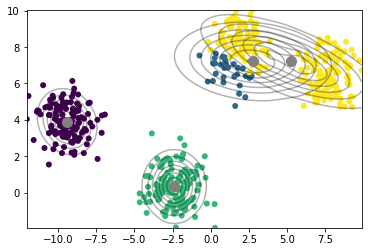

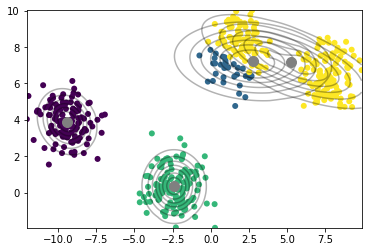

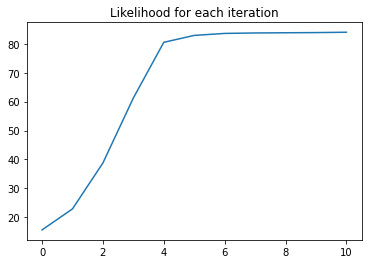

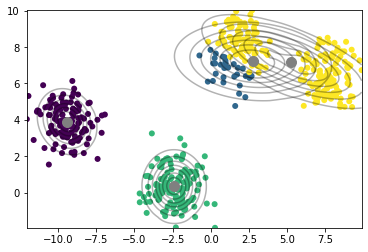

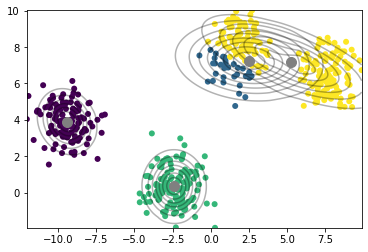

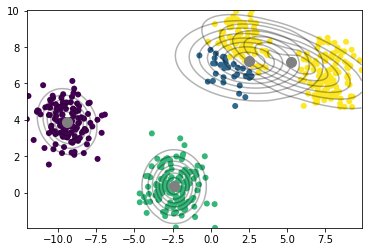

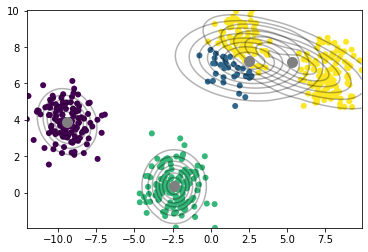

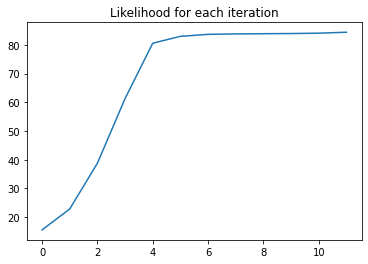

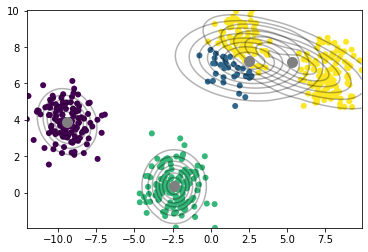

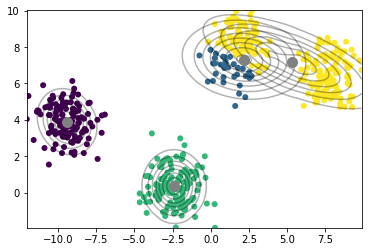

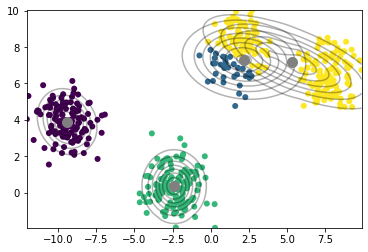

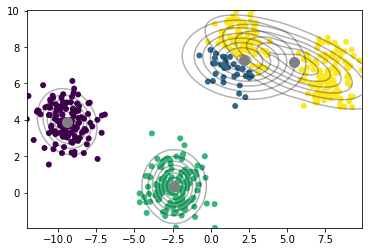

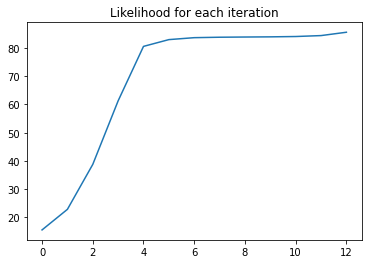

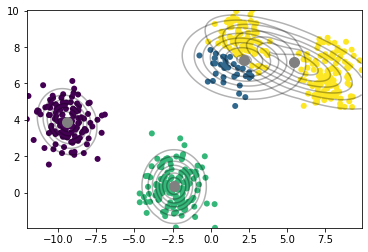

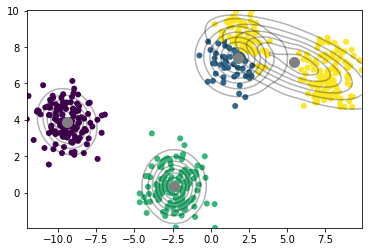

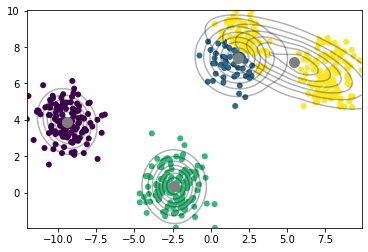

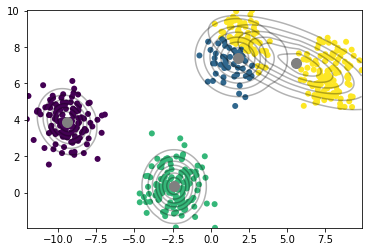

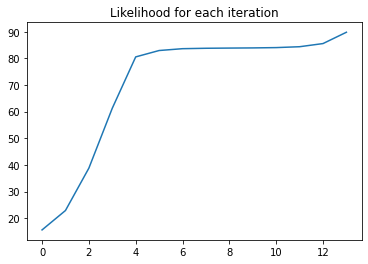

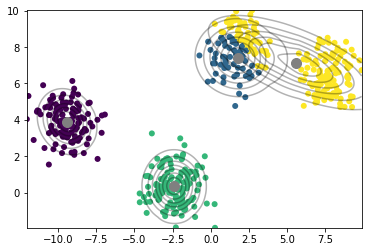

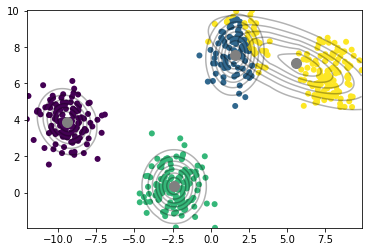

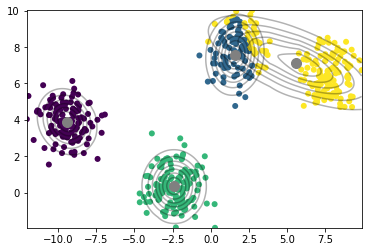

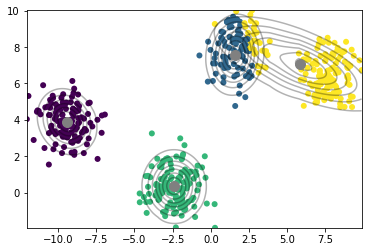

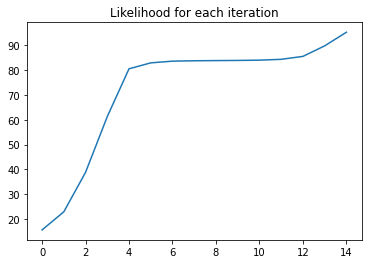

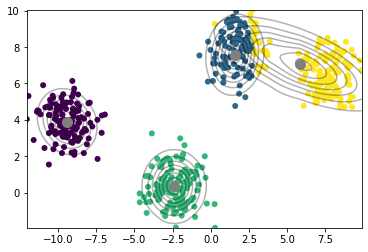

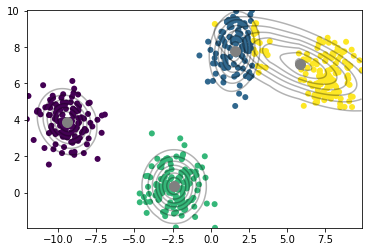

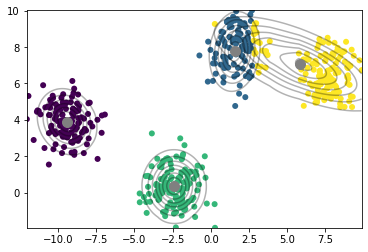

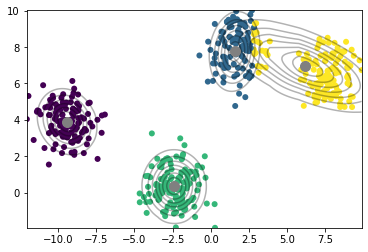

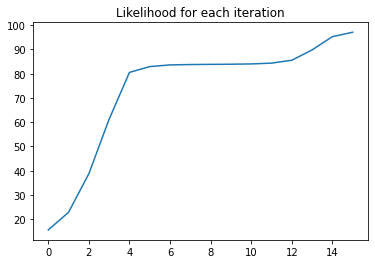

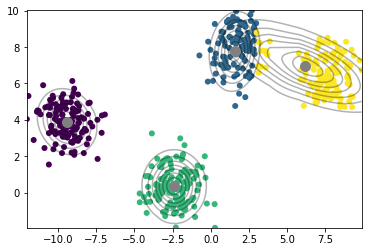

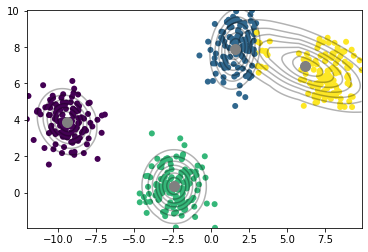

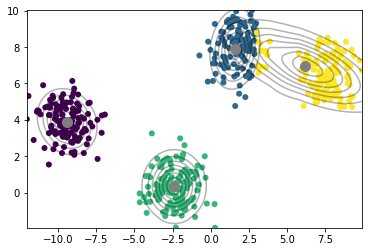

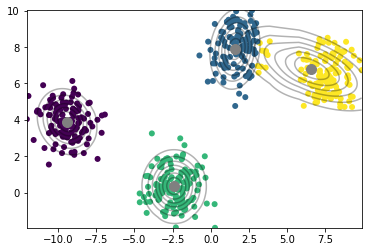

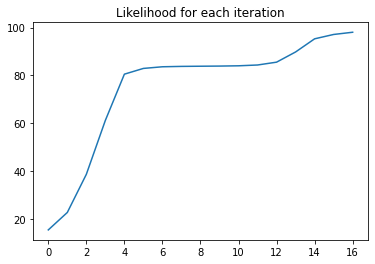

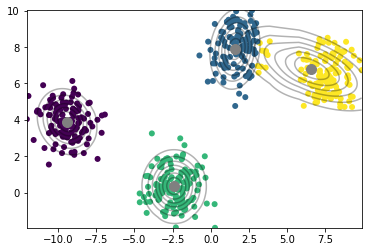

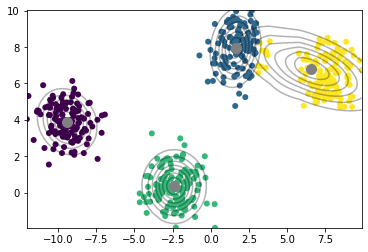

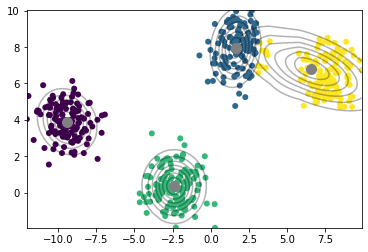

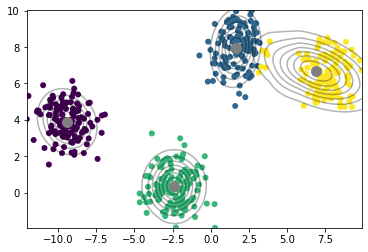

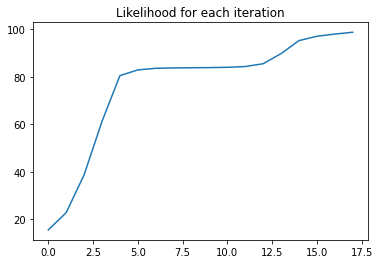

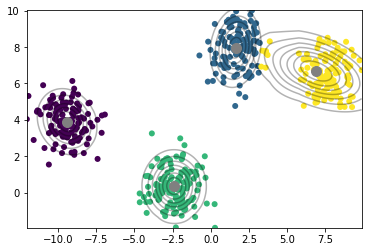

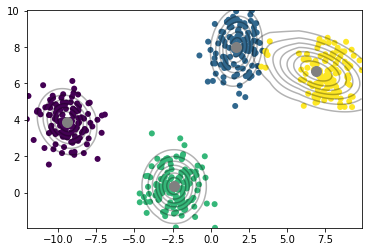

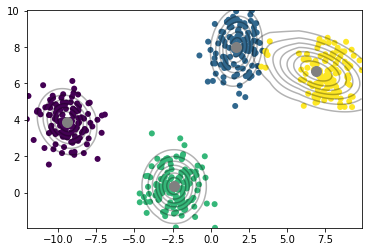

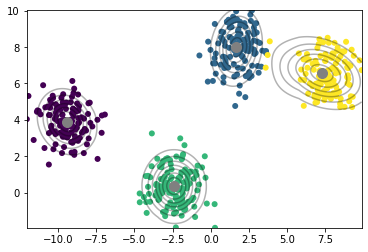

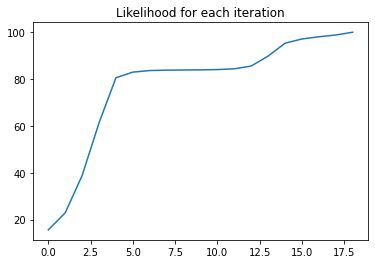

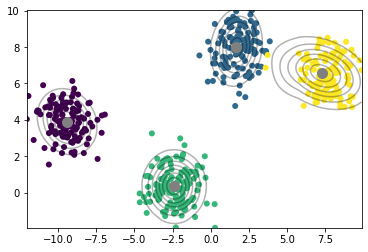

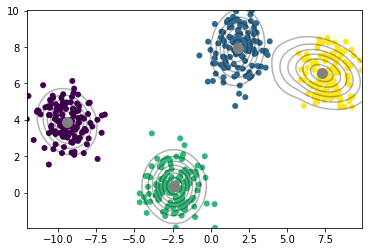

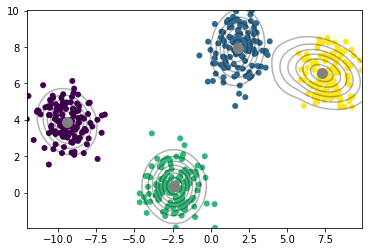

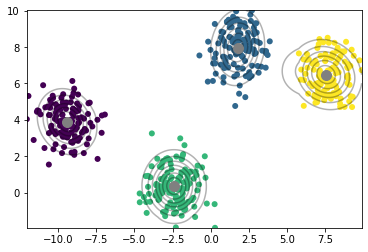

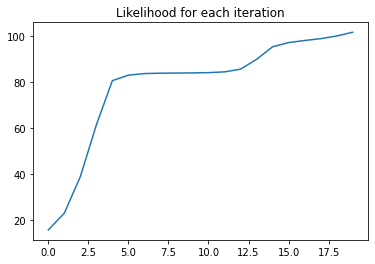

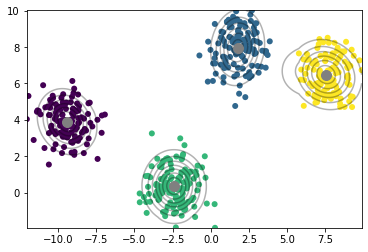

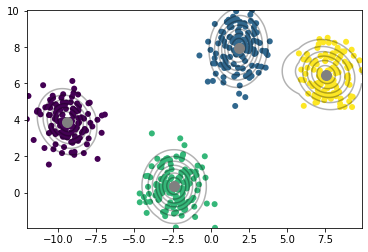

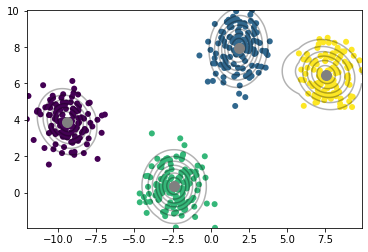

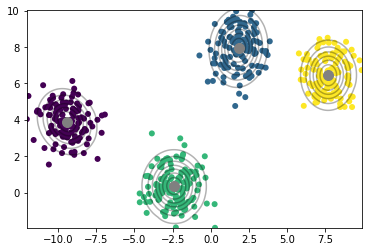

In [ ]:
#Run for max_iter
def predict(X):
    weights = predict_proba(X)
    return np.argmax(weights, axis=1)

log = []

for iteration in range(max_iter):
  weights = predict_proba(X)
  phi = weights.mean(axis=0)
  #Plot Likelihood function value
  print(f'Likelihood for each {iteration} iteration',np.array(sumoflikelihood).sum())
  log.append(np.array(sumoflikelihood).sum())
  fig1 = plt.figure()
  ax1 = fig1.add_subplot(111)
  ax1.set_title('Likelihood for each iteration')
  ax1.plot(log)
  
  for i in range(k):
    weight = weights[:, [i]]
    total_weight = weight.sum()
    mu[i] = (X * weight).sum(axis=0) / total_weight
    sigma[i] = np.cov(X.T, 
        aweights=(weight/total_weight).flatten(), 
        bias=True)
    fig = plt.figure()
    classes = predict(X)
    ax = fig.add_subplot(111)
    # plot x,y data with c as the color vector, set the line width of the markers to 0
    ax.scatter(X[:,0], X[:,1], c=classes, lw=0)
    x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
    XY = np.array([x.flatten(),y.flatten()]).T
    for m,c in zip(mu,sigma):
      multi_normal = multivariate_normal(mean=m,cov=c)
      ax.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
      ax.scatter(m[0],m[1],c='grey',zorder=10,s=100)

# GMM Function

In [ ]:
class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [  X[row_index,:] for row_index in random_row ]
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
    
    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T, 
                aweights=(weight/total_weight).flatten(), 
                bias=True)

    def fit(self, X):
        self.initialize(X)
        log = []
        for iteration in range(self.max_iter):

          self.e_step(X)
          self.m_step(X)

          log.append(np.array(sumoflikelihood).sum())
          error = log[iteration] - log[iteration-1];
          print(f'Likelihood for each {iteration} iteration',np.array(sumoflikelihood).sum())
          if iteration == 0:
            pass;
          elif error<0.0001:
            break;
          fig = plt.figure()
          classes = self.predict(X)
          ax = fig.add_subplot(111)
          # plot x,y data with c as the color vector, set the line width of the markers to 0
          ax.scatter(X[:,0], X[:,1], c=classes, lw=0)
          x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
          XY = np.array([x.flatten(),y.flatten()]).T
          for m,c in zip(self.mu,self.sigma):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
            ax.scatter(m[0],m[1],c='grey',zorder=10,s=100)


        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111)
        ax1.set_title('Likelihood for each iteration')
        ax1.plot(log)
        plt.show()
        
        


            
    def predict_proba(self, X):
        global sumoflikelihood
        sumoflikelihood = []
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i], 
                cov=self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)
        sumoflikelihood.append(likelihood.sum())    
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

Likelihood for each 0 iteration 6.18467372254848
Likelihood for each 1 iteration 9.77564850991331
Likelihood for each 2 iteration 17.700576724332866
Likelihood for each 3 iteration 25.14632130356579
Likelihood for each 4 iteration 30.217516693220038
Likelihood for each 5 iteration 30.915298176354327
Likelihood for each 6 iteration 31.102862492254886
Likelihood for each 7 iteration 31.139501343712837
Likelihood for each 8 iteration 31.157982075752766
Likelihood for each 9 iteration 31.176955766003623
Likelihood for each 10 iteration 31.21502606134621
Likelihood for each 11 iteration 31.324105347086622
Likelihood for each 12 iteration 31.71657548530571
Likelihood for each 13 iteration 33.13450085091263
Likelihood for each 14 iteration 34.97126992208053
Likelihood for each 15 iteration 35.60476884467996
Likelihood for each 16 iteration 35.99869723910779
Likelihood for each 17 iteration 36.51748519007997
Likelihood for each 18 iteration 37.5934288981976
Likelihood for each 19 iteration 39.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Likelihood for each 21 iteration 40.94086349459725
Likelihood for each 22 iteration 40.94103353568314
Likelihood for each 23 iteration 40.941033317931144


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


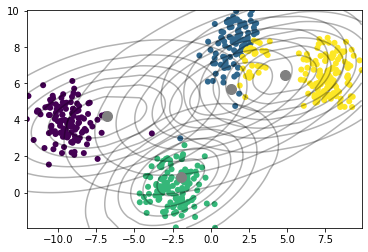

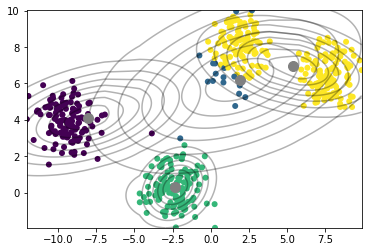

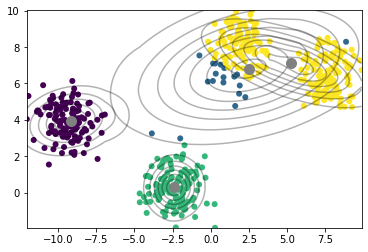

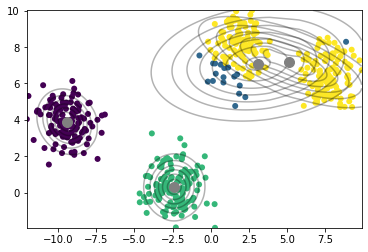

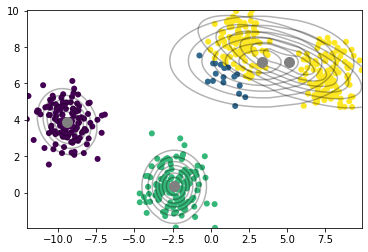

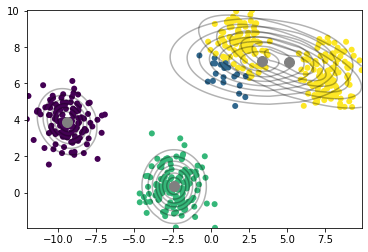

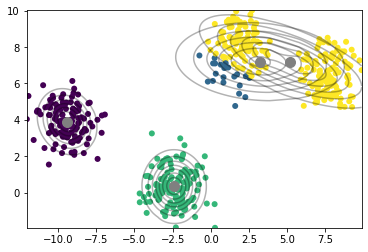

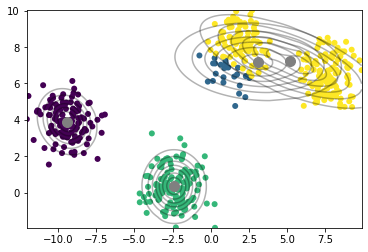

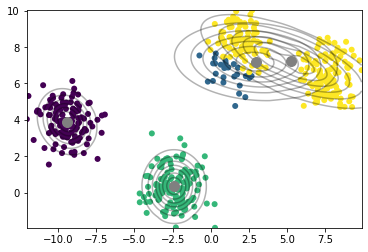

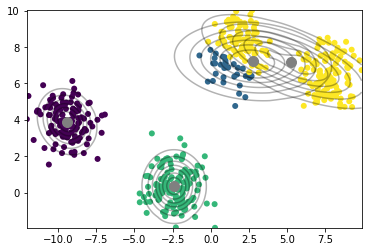

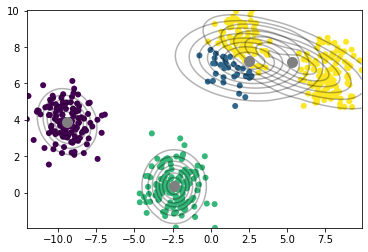

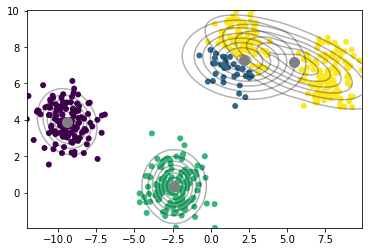

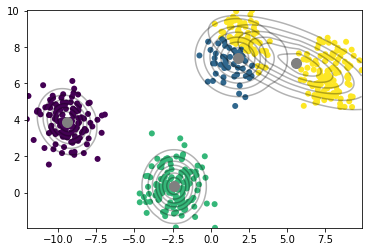

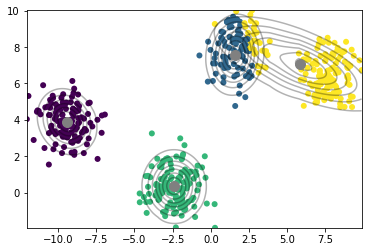

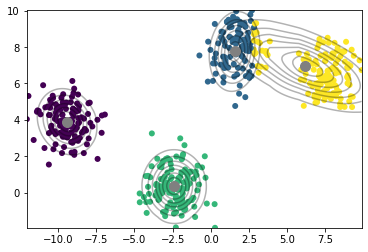

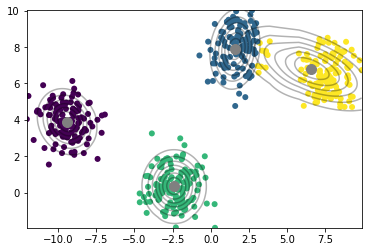

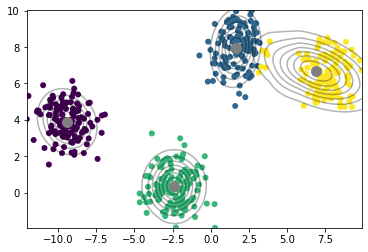

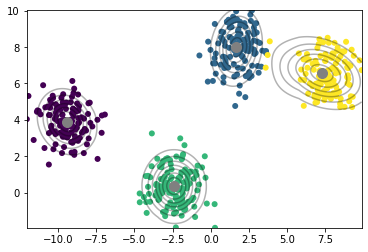

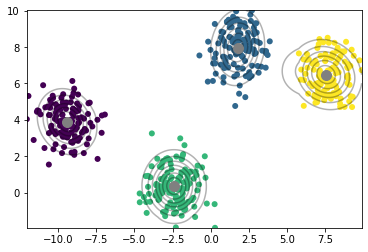

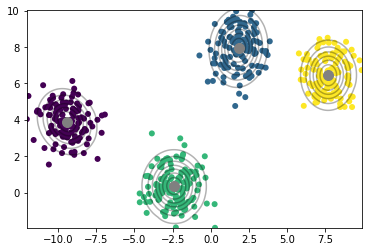

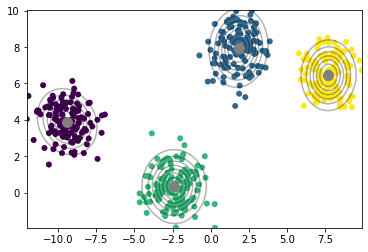

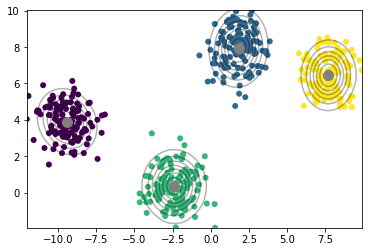

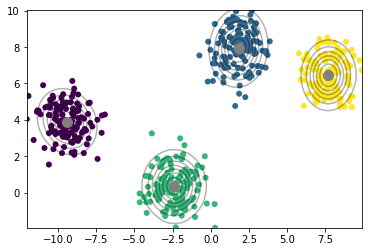

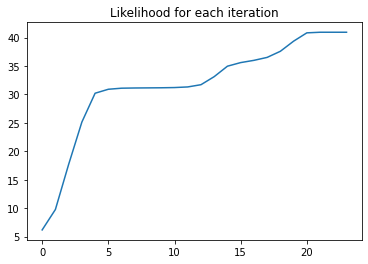

In [ ]:
np.random.seed(42)
gmm = GMM(k=4, max_iter=50)
gmm.fit(X)